In [186]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [188]:
data = pd.read_csv("E:\insurance\insurance.csv")

In [190]:
data.shape

(1338, 7)

In [192]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [194]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [196]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [198]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [200]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [202]:
data = pd.get_dummies(data,columns = ["sex","smoker","region"]).astype(int)

In [204]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [206]:
#data.isnull().sum()         no null values

In [208]:
X = data.drop(["charges"],axis = 1)
y = data["charges"]

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [212]:

model =  LinearRegression()
model

LinearRegression()

In [214]:
model.fit(X_train,y_train)

LinearRegression()

In [216]:
y_pred = model.predict(X_test)

In [218]:
y_pred

array([ 9087.64215363,  7232.55948323, 36744.39282136,  9390.86060464,
       26835.96961506, 10700.88438873,   176.85511159, 16763.42629132,
        1176.75821394, 11169.05006058, 28141.94818892,  9355.95788892,
        5221.40321606, 38448.8671946 , 40094.17744513, 36935.83914845,
       15154.15405998, 35854.24430695,  9256.40504231, 31345.37256898,
        3720.33899543, 10086.00383365,  2389.24817343,  7018.12055439,
       11443.40843791, 12895.76372111, 14625.6227313 ,  6201.46301286,
        9937.46817478,  2284.12664592,  9180.25612059, 12967.21335176,
        4415.21189286,  3280.78184264,  4616.51137491, 12914.07103691,
        2005.75807266,  8668.775376  , 33415.56094315, 32673.29028852,
        3873.19203608,  4379.17387366, 14024.82770535, 11450.34188499,
        8673.91733215, 12093.78520875,  5238.19686233,  3218.05521838,
       35328.14327403,  9166.62577563, 15884.51962992,  2376.08281379,
       12380.50385494,  1609.23655956, 13396.31680531, 12705.29630435,
      

In [220]:
mae = mean_absolute_error(y_test, y_pred)
mae

#Mean Absolute Error (MAE)
#Definition: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.
#Interpretation: It is the average of the absolute differences between predicted and actual values, providing a linear score
#without squared penalties.

4176.26839529925

In [222]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse
#Root Mean Squared Error (RMSE)
#Definition: RMSE is the square root of the average of the squared differences between predicted and actual values.
#Interpretation: It gives a higher weight to larger errors, making it useful for identifying significant errors and 
#their impact on the model's performance.

5793.655127404499

In [224]:
r2 = r2_score(y_test, y_pred)
r2

#R² Score (Coefficient of Determination)
#Definition: R² score represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
#Interpretation: It ranges from 0 to 1, where 1 indicates a perfect fit, and shows how well the model's predictions match the actual data,
#with higher values indicating better performance.


0.7837888448800692

In [226]:
y_pred

array([ 9087.64215363,  7232.55948323, 36744.39282136,  9390.86060464,
       26835.96961506, 10700.88438873,   176.85511159, 16763.42629132,
        1176.75821394, 11169.05006058, 28141.94818892,  9355.95788892,
        5221.40321606, 38448.8671946 , 40094.17744513, 36935.83914845,
       15154.15405998, 35854.24430695,  9256.40504231, 31345.37256898,
        3720.33899543, 10086.00383365,  2389.24817343,  7018.12055439,
       11443.40843791, 12895.76372111, 14625.6227313 ,  6201.46301286,
        9937.46817478,  2284.12664592,  9180.25612059, 12967.21335176,
        4415.21189286,  3280.78184264,  4616.51137491, 12914.07103691,
        2005.75807266,  8668.775376  , 33415.56094315, 32673.29028852,
        3873.19203608,  4379.17387366, 14024.82770535, 11450.34188499,
        8673.91733215, 12093.78520875,  5238.19686233,  3218.05521838,
       35328.14327403,  9166.62577563, 15884.51962992,  2376.08281379,
       12380.50385494,  1609.23655956, 13396.31680531, 12705.29630435,
      

In [228]:
y_test

764      9095
887      5272
890     29330
1293     9301
259     33750
        ...  
109     47055
575     12222
535      6067
543     63770
846      9872
Name: charges, Length: 268, dtype: int32

In [238]:
X_test.reset_index(inplace = True)

In [242]:
X_test.drop(["index"],axis = 1 , inplace = True)

In [244]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,45,25,2,1,0,1,0,1,0,0,0
1,36,30,0,1,0,1,0,0,1,0,0
2,64,26,0,1,0,0,1,0,1,0,0
3,46,25,3,0,1,1,0,0,1,0,0
4,19,31,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
263,63,35,0,0,1,0,1,0,0,1,0
264,58,27,0,1,0,1,0,0,1,0,0
265,38,28,1,0,1,1,0,1,0,0,0
266,54,47,0,1,0,0,1,0,0,1,0


In [252]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace = True)

In [260]:
y_test

,charges
0,9095
1,5272
2,29330
3,9301
4,33750
...,...
263,47055
264,12222
265,6067
266,63770


In [274]:
y_pred = pd.DataFrame(y_pred)
y_pred.rename(columns={0:"Predict_Charges"},inplace = True)

In [276]:
y_pred

,Predict_Charges
0,9087.642154
1,7232.559483
2,36744.392821
3,9390.860605
4,26835.969615
...,...
263,39187.297972
264,11881.775090
265,7850.017626
266,40918.297718


In [278]:
Evaluation = pd.concat([X_test,y_test,y_pred],axis = 1)

In [280]:
Evaluation

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Predict_Charges
0,45,25,2,1,0,1,0,1,0,0,0,9095,9087.642154
1,36,30,0,1,0,1,0,0,1,0,0,5272,7232.559483
2,64,26,0,1,0,0,1,0,1,0,0,29330,36744.392821
3,46,25,3,0,1,1,0,0,1,0,0,9301,9390.860605
4,19,31,0,0,1,0,1,0,1,0,0,33750,26835.969615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,63,35,0,0,1,0,1,0,0,1,0,47055,39187.297972
264,58,27,0,1,0,1,0,0,1,0,0,12222,11881.775090
265,38,28,1,0,1,1,0,1,0,0,0,6067,7850.017626
266,54,47,0,1,0,0,1,0,0,1,0,63770,40918.297718


In [295]:
kmeans = KMeans()
kmeans.fit(Evaluation)

KMeans()

In [301]:
tsd = []
for k in range(1,12):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(Evaluation)
    tsd.append(kmeans.inertia_)
tsd

[72459105917.45895,
 18108122267.361935,
 11685294907.995201,
 7151198963.304618,
 4869768343.373045,
 4004544728.1573577,
 3683569043.9964647,
 2848109508.971311,
 2366476507.1123753,
 2257687120.205732,
 1680015408.4380121]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


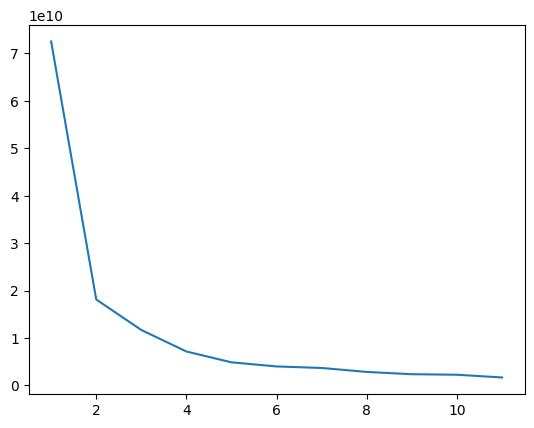

In [303]:
sns.lineplot(x = np.arange(1,12), y = tsd)

plt.show()

In [305]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(Evaluation)

KMeans(n_clusters=4)

In [307]:
kmeans.inertia_

7153785470.760487

In [311]:
kmeans.predict(Evaluation)

array([3, 0, 2, 3, 2, 0, 0, 3, 0, 3, 2, 3, 0, 1, 1, 1, 3, 1, 3, 2, 0, 3,
       0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 2, 1, 0, 0, 3, 3,
       0, 3, 0, 0, 1, 0, 3, 0, 3, 0, 3, 3, 0, 1, 3, 3, 3, 0, 2, 0, 3, 0,
       2, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 2, 0, 1, 1, 1, 0, 3,
       3, 3, 3, 2, 2, 0, 1, 3, 2, 0, 2, 0, 0, 0, 3, 3, 3, 0, 3, 2, 0, 2,
       3, 0, 3, 1, 3, 0, 2, 2, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0,
       0, 3, 0, 3, 3, 2, 1, 1, 0, 3, 0, 2, 0, 2, 0, 0, 3, 0, 1, 0, 0, 1,
       3, 0, 3, 3, 1, 1, 3, 0, 3, 0, 0, 3, 1, 1, 1, 0, 3, 0, 3, 0, 0, 2,
       2, 3, 2, 3, 2, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 1, 3, 3, 0, 3,
       0, 3, 0, 2, 0, 3, 2, 2, 3, 0, 3, 0, 3, 3, 3, 2, 0, 0, 0, 3, 3, 0,
       0, 3, 3, 1, 0, 1, 0, 0, 3, 3, 0, 3, 0, 1, 3, 3, 0, 0, 1, 0, 3, 1,
       0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 3, 2, 1,
       3, 0, 1, 3])

In [315]:
clusters = kmeans.predict(Evaluation)
Evaluation["Clusters"] = clusters

In [317]:
Evaluation

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Predict_Charges,Clusters
0,45,25,2,1,0,1,0,1,0,0,0,9095,9087.642154,3
1,36,30,0,1,0,1,0,0,1,0,0,5272,7232.559483,0
2,64,26,0,1,0,0,1,0,1,0,0,29330,36744.392821,2
3,46,25,3,0,1,1,0,0,1,0,0,9301,9390.860605,3
4,19,31,0,0,1,0,1,0,1,0,0,33750,26835.969615,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,63,35,0,0,1,0,1,0,0,1,0,47055,39187.297972,1
264,58,27,0,1,0,1,0,0,1,0,0,12222,11881.775090,3
265,38,28,1,0,1,1,0,1,0,0,0,6067,7850.017626,0
266,54,47,0,1,0,0,1,0,0,1,0,63770,40918.297718,1


In [319]:
Evaluation["Clusters"].value_counts()

Clusters
0    109
3    102
1     29
2     28
Name: count, dtype: int64

In [327]:
Evaluation[Evaluation["Clusters"]  == 0].head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Predict_Charges,Clusters
1,36,30,0,1,0,1,0,0,1,0,0,5272,7232.559483,0
5,34,42,1,0,1,1,0,0,0,0,1,4536,10700.884389,0
6,19,22,0,1,0,1,0,0,1,0,0,2117,176.855112,0
8,28,17,0,1,0,1,0,1,0,0,0,3732,1176.758214,0
12,29,29,1,1,0,1,0,0,0,1,0,3947,5221.403216,0


In [325]:
Evaluation[Evaluation["Clusters"]  == 1].head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Predict_Charges,Clusters
13,46,42,3,0,1,0,1,0,0,1,0,46151,38448.867195,1
14,60,40,0,0,1,0,1,0,0,1,0,48673,40094.177445,1
15,47,38,2,0,1,0,1,0,0,1,0,44202,36935.839148,1
17,47,36,1,1,0,0,1,0,0,1,0,42969,35854.244307,1
39,36,35,1,0,1,0,1,0,0,1,0,38709,32673.290289,1


In [329]:
Evaluation[Evaluation["Clusters"]  == 2].head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Predict_Charges,Clusters
2,64,26,0,1,0,0,1,0,1,0,0,29330,36744.392821,2
4,19,31,0,0,1,0,1,0,1,0,0,33750,26835.969615,2
10,30,24,3,0,1,0,1,0,0,0,1,18259,28141.948189,2
19,43,26,0,1,0,0,1,0,1,0,0,21774,31345.372569,2
38,52,24,1,1,0,0,1,0,1,0,0,23887,33415.560943,2


In [331]:
Evaluation[Evaluation["Clusters"]  == 3].head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Predict_Charges,Clusters
0,45,25,2,1,0,1,0,1,0,0,0,9095,9087.642154,3
3,46,25,3,0,1,1,0,0,1,0,0,9301,9390.860605,3
7,64,37,0,0,1,1,0,0,1,0,0,14210,16763.426291,3
9,49,28,3,0,1,1,0,0,1,0,0,10264,11169.050061,3
11,41,30,2,0,1,1,0,0,1,0,0,7256,9355.957889,3
